In [10]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

# Шлях до файлу CSV
file_path = r"C:\Users\a0494\Desktop\Nasa_hac\fires_with_speed_share.csv"

# Завантаження датасету
df = pd.read_csv(file_path)

# Виведення назв стовпців
print("Назви стовпців:")
print(df.columns)
# Виведення розміру датасету (кількість рядків та стовпців)
print("\nРозмір датасету:")
print(df.shape)


Назви стовпців:
Index(['X', 'Y', 'elevation', 'acq_time', 'frp', 'acq_date', 'confidence',
       'latitude', 'scan', 'instrument', 'time_sprea', 'type', 'slope',
       'version', 'brightness', 'group_id', 'bright_t31', 'daynight', 'id',
       'satellite', 'track', 'Map', 'longitude', 'nearest',
       'distance_to_nearest'],
      dtype='object')

Розмір датасету:
(20537, 25)


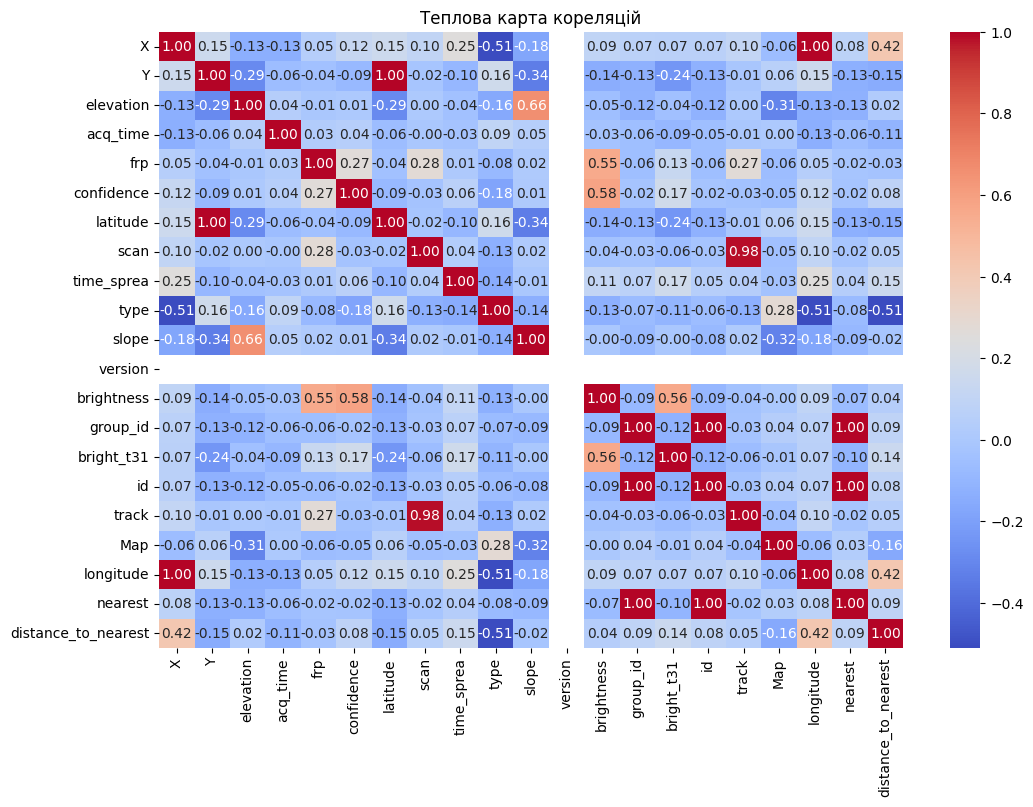

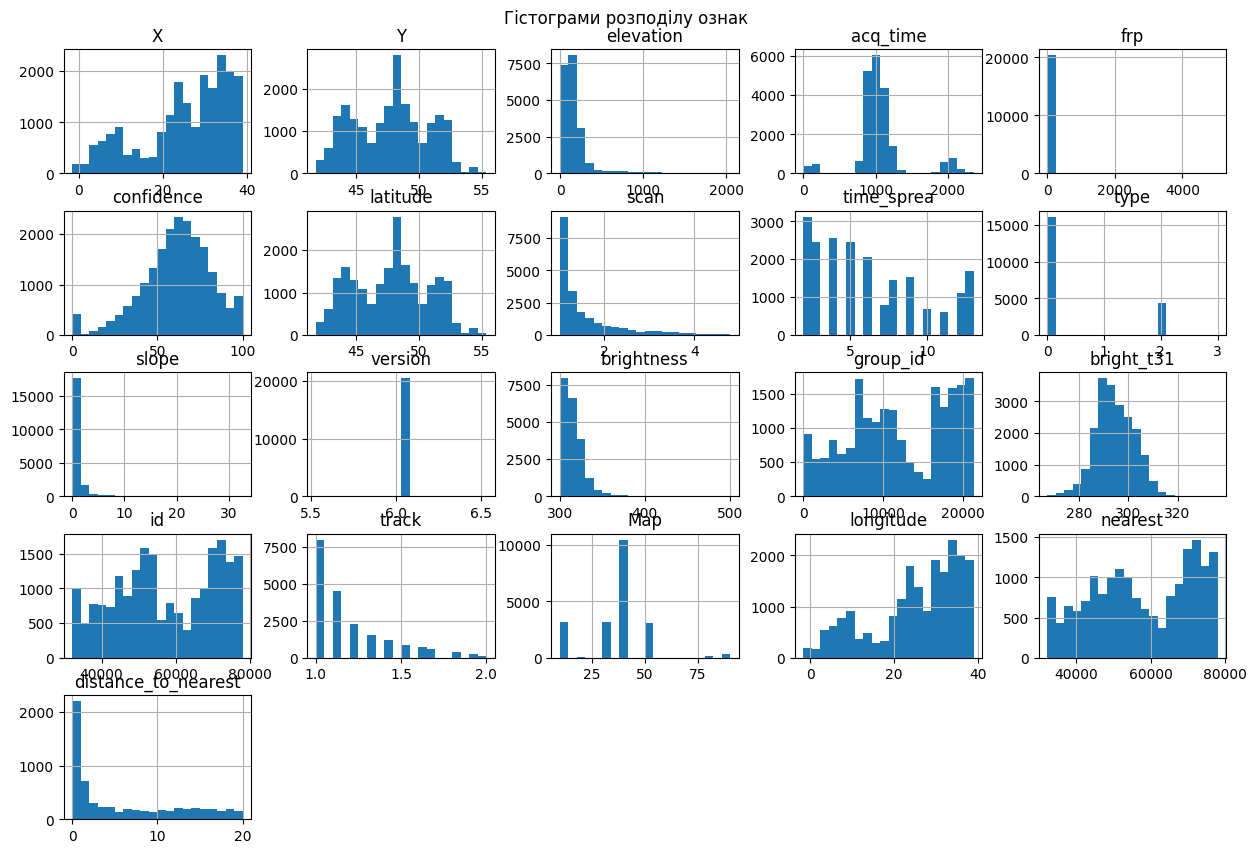

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Графік теплової карти для кореляцій
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Теплова карта кореляцій')
plt.show()

# Гістограми розподілу ознак
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Гістограми розподілу ознак', x=0.5, y=0.92, ha='center', fontsize='large')
plt.show()


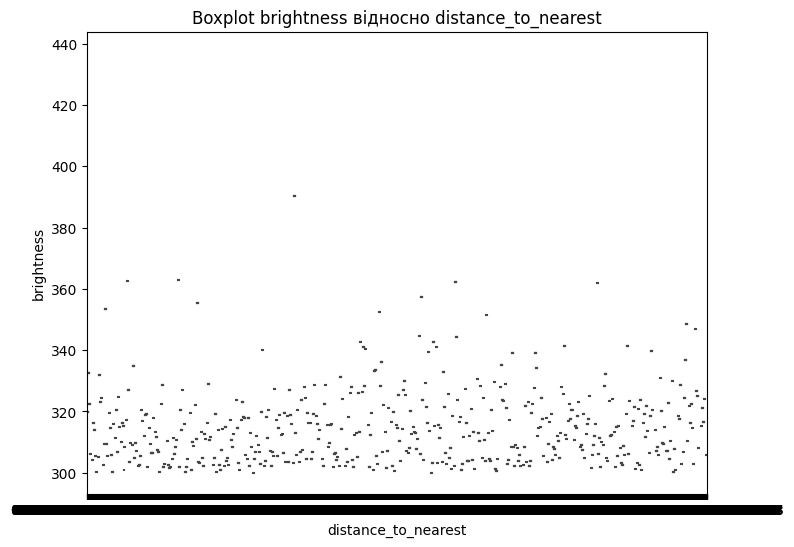

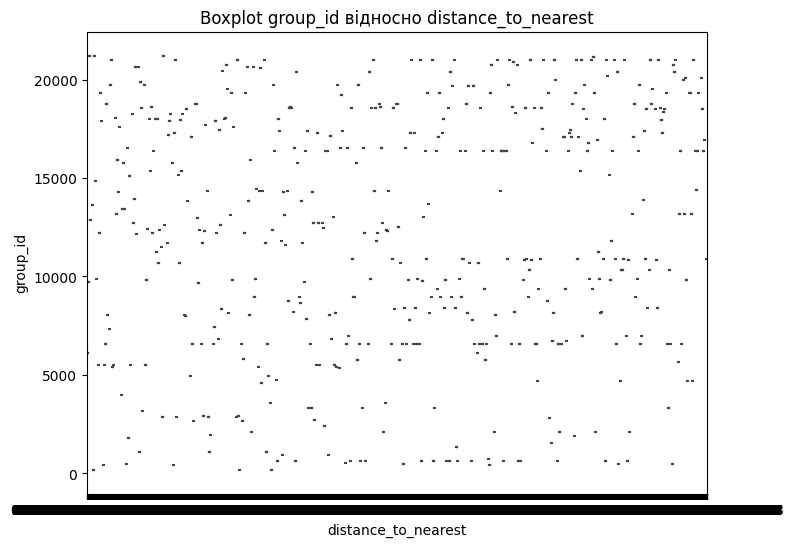

In [15]:
# Boxplot-и відносно цільової змінної (замініть 'target_column' на назву вашої цільової змінної)
target_column = 'distance_to_nearest'
for column in ['brightness','group_id']:
    if column != target_column:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=target_column, y=column, data=df)
        plt.title(f'Boxplot {column} відносно {target_column}')
        plt.show()

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Вибір числових ознак для нормалізації
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns

# Ініціалізація об'єкта MinMaxScaler
scaler = MinMaxScaler()

# Нормалізація даних
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Виведення перших рядків нормалізованого датасету
print(df.head())


          X         Y  elevation  acq_time       frp    acq_date  confidence  \
0  0.761174  0.221350    0.00292  0.002967  0.002819  2021-03-09        0.69   
1  0.760551  0.221608    0.00292  0.002967  0.005380  2021-03-09        1.00   
2  0.760610  0.222273    0.00292  0.002967  0.002561  2021-03-09        0.13   
3  0.760300  0.222399    0.00292  0.002967  0.005241  2021-03-09        1.00   
4  0.761352  0.223329    0.00292  0.002967  0.002998  2021-03-09        0.74   

   latitude  scan instrument  ...  group_id  bright_t31  daynight        id  \
0  0.221350   0.0      MODIS  ...  0.391518    0.086455         N  0.393079   
1  0.221608   0.0      MODIS  ...  0.391518    0.106628         N  0.393058   
2  0.222273   0.0      MODIS  ...  0.391518    0.085014         N  0.393014   
3  0.222399   0.0      MODIS  ...  0.391518    0.095101         N  0.392992   
4  0.223329   0.0      MODIS  ...  0.391518    0.085014         N  0.392970   

   satellite  track  Map longitude  nearest 

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import math
# Шлях до нового файлу CSV
file_path = r"C:\Users\a0494\Desktop\Nasa_hac\fires_with_speed_share.csv"

# Завантаження датасету
df = pd.read_csv(file_path)

# Вибір потрібних ознак і цільової змінної
features = ['elevation', 'acq_time', 'frp', 'confidence', 'slope', 'brightness', 'bright_t31', 'Map']
target = 'distance_to_nearest'

# Виділення підмножини даних
data = df[features + [target]].copy()

# Розділення на тренувальний та тестовий набір
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Вибірки ознак та цільової змінної
X_train = train_data[features]
y_train = train_data[target].fillna(0)  # Заповнюємо NaN значення в цільовій змінній нулями

X_test = test_data[features]
y_test = test_data[target].fillna(0)  # Заповнюємо NaN значення в цільовій змінній нулями

# Обробка null значень
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Побудова моделі випадкового лісу
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_imputed, y_train)

# Передбачення
predictions = rf_model.predict(X_test_imputed)

# Оцінка моделі
mse = math.sqrt(mean_squared_error(y_test, predictions))
print(f'Mean Error: {mse}')

# Виведення результатів
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(results.head())

Mean Squared Error: 4.355162187128393
         Actual  Predicted
2323   0.000000   1.674908
18111  0.000000   6.233357
10259  2.861962   3.311373
15942  0.000000   4.981366
13889  0.000000   2.042039


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error

# Завантаження датасету
df = pd.read_csv(r"C:\Users\a0494\Desktop\Nasa_hac\fires_with_speed_share.csv")

# Вибір потрібних ознак і цільової змінної
features = ['elevation', 'acq_time', 'frp', 'confidence', 'slope', 'brightness', 'bright_t31', 'Map']
target = 'distance_to_nearest'

# Виділення підмножини даних
data = df[features + [target]].copy()

# Розділення на тренувальний та тестовий набір
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Вибірки ознак та цільової змінної
X_train = train_data[features]
y_train = train_data[target].fillna(0)  # Заповнюємо NaN значення в цільовій змінній нулями

X_test = test_data[features]
y_test = test_data[target].fillna(0)  # Заповнюємо NaN значення в цільовій змінній нулями

# Обробка null значень
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Навчання kNN
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_imputed, y_train)
knn_predictions = knn_model.predict(X_test_imputed)
knn_mae = mean_absolute_error(y_test, knn_predictions)
print(f'kNN Mean Absolute Error: {knn_mae}')

# Навчання дерева ухвалення рішень
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_imputed, y_train)
dt_predictions = dt_model.predict(X_test_imputed)
dt_mae = mean_absolute_error(y_test, dt_predictions)
print(f'Decision Tree Mean Absolute Error: {dt_mae}')

# Навчання SVM
svm_model = SVR()
svm_model.fit(X_train_imputed, y_train)
svm_predictions = svm_model.predict(X_test_imputed)
svm_mae = mean_absolute_error(y_test, svm_predictions)
print(f'SVM Mean Absolute Error: {svm_mae}')

# Навчання Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_imputed, y_train)
rf_predictions = rf_model.predict(X_test_imputed)
rf_mae = mean_absolute_error(y_test, rf_predictions)
print(f'Random Forest Mean Absolute Error: {rf_mae}')

# Навчання AdaBoost
adaboost_model = AdaBoostRegressor(random_state=42)
adaboost_model.fit(X_train_imputed, y_train)
adaboost_predictions = adaboost_model.predict(X_test_imputed)
adaboost_mae = mean_absolute_error(y_test, adaboost_predictions)
print(f'AdaBoost Mean Absolute Error: {adaboost_mae}')

kNN Mean Absolute Error: 2.7752248721167994
Decision Tree Mean Absolute Error: 3.026802079802973
SVM Mean Absolute Error: 1.971922453615204
Random Forest Mean Absolute Error: 2.8042062513147985
AdaBoost Mean Absolute Error: 4.0869660540007064


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Завантаження датасету
df = pd.read_csv(r"C:\Users\a0494\Desktop\Nasa_hac\fires_with_speed_share.csv")

# Вибір потрібних ознак і цільової змінної
features = ['elevation', 'acq_time', 'frp', 'confidence', 'slope', 'brightness', 'bright_t31', 'Map']
target = 'distance_to_nearest'

# Виділення підмножини даних
data = df[features + [target]].copy()

# Розділення на тренувальний та тестовий набір
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Вибірки ознак та цільової змінної
X_train = train_data[features]
y_train = train_data[target].fillna(0)  # Заповнюємо NaN значення в цільовій змінній нулями

X_test = test_data[features]
y_test = test_data[target].fillna(0)  # Заповнюємо NaN значення в цільовій змінній нулями

# Обробка null значень
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Grid Search для kNN
knn_param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(KNeighborsRegressor(), knn_param_grid, scoring='neg_mean_absolute_error', cv=5)
knn_grid.fit(X_train_imputed, y_train)
best_knn_model = knn_grid.best_estimator_
knn_predictions = best_knn_model.predict(X_test_imputed)
knn_mae = mean_absolute_error(y_test, knn_predictions)
print(f'kNN Best Model Mean Absolute Error: {knn_mae}')

# Grid Search для SVM
svm_param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(SVR(), svm_param_grid, scoring='neg_mean_absolute_error', cv=5)
svm_grid.fit(X_train_imputed, y_train)
best_svm_model = svm_grid.best_estimator_
svm_predictions = best_svm_model.predict(X_test_imputed)
svm_mae = mean_absolute_error(y_test, svm_predictions)
print(f'SVM Best Model Mean Absolute Error: {svm_mae}')

# Виведення результатів
print('\nBest kNN Model:')
print(best_knn_model)
print('\nBest SVM Model:')
print(best_svm_model)

# Оцінка класифікаторів
def evaluate_classifier(model, X, y_true):
    y_pred = model.predict(X)
    print('Classification Report:')
    print(classification_report(y_true, y_pred))
    print('Confusion Matrix:')
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Оцінка найкращих моделей
evaluate_classifier(best_knn_model, X_test_imputed, y_test)
evaluate_classifier(best_svm_model, X_test_imputed, y_test)

kNN Best Model Mean Absolute Error: 2.7239232310005734
